In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
pd.options.mode.chained_assignment = None

## Problem Statement
For every district, state and overall, find the week and month having peak (highest) number of active cases for wave-1 and wave-2. The output file contains columns: districtid, wave1 − weekid, wave2 − weekid, wave1 − monthid, wave2 − monthid.

In [67]:
#Using previous results to get all the districts which has to be considered for this assignment
week_cases = pd.read_csv('../output/cases-week.csv')
district_keys = list(week_cases['districtid'].unique())
print("Total districts available: ", len(district_keys))

Total districts available:  642


In [68]:
district_keys

['AP_Anantapur',
 'AP_Chittoor',
 'AP_East Godavari',
 'AP_Guntur',
 'AP_Krishna',
 'AP_Kurnool',
 'AP_Prakasam',
 'AP_S.P.S. Nellore',
 'AP_Srikakulam',
 'AP_Visakhapatnam',
 'AP_Vizianagaram',
 'AP_West Godavari',
 'AP_Y.S.R. Kadapa',
 'AR_Anjaw',
 'AR_Changlang',
 'AR_East Kameng',
 'AR_East Siang',
 'AR_Kamle',
 'AR_Kra Daadi',
 'AR_Kurung Kumey',
 'AR_Lepa Rada',
 'AR_Lohit',
 'AR_Longding',
 'AR_Lower Dibang Valley',
 'AR_Lower Siang',
 'AR_Lower Subansiri',
 'AR_Namsai',
 'AR_Pakke Kessang',
 'AR_Papum Pare',
 'AR_Shi Yomi',
 'AR_Siang',
 'AR_Tawang',
 'AR_Tirap',
 'AR_Upper Dibang Valley',
 'AR_Upper Siang',
 'AR_Upper Subansiri',
 'AR_West Kameng',
 'AR_West Siang',
 'AS_Cachar',
 'AS_Dhubri',
 'AS_Dibrugarh',
 'AS_Goalpara',
 'AS_Golaghat',
 'AS_Lakhimpur',
 'AS_Morigaon',
 'AS_Udalguri',
 'BR_Araria',
 'BR_Arwal',
 'BR_Aurangabad',
 'BR_Banka',
 'BR_Begusarai',
 'BR_Bhagalpur',
 'BR_Bhojpur',
 'BR_Buxar',
 'BR_Darbhanga',
 'BR_East Champaran',
 'BR_Gaya',
 'BR_Gopalganj',
 '

In [69]:
dt_wise_covid_data = pd.read_csv('../data/districts.csv', parse_dates=['Date'], index_col='Date')
dt_wise_covid_data = dt_wise_covid_data.loc['2020-03-15':'2021-08-14']
dt_wise_covid_data

,State,District,Confirmed,Recovered,Deceased,Other,Tested
Date,,,,,,,
2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0,0,NaN
2020-04-26,Andhra Pradesh,Anantapur,53,14,4,0,NaN
2020-04-26,Andhra Pradesh,Chittoor,73,13,0,0,NaN
2020-04-26,Andhra Pradesh,East Godavari,39,12,0,0,NaN
2020-04-26,Andhra Pradesh,Guntur,214,29,8,0,NaN
2020-04-26,Andhra Pradesh,Krishna,177,29,8,0,NaN
2020-04-26,Andhra Pradesh,Kurnool,279,31,9,0,NaN
2020-04-26,Andhra Pradesh,Prakasam,56,23,0,0,NaN
2020-04-26,Andhra Pradesh,S.P.S. Nellore,72,23,2,0,NaN


In [70]:
distr_wise_data = pd.read_csv('../data/district_wise.csv')
distr_wise_data

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,434,0,434,0,0,0,0,0,0,NaN,NaN
5,4,AP,Andhra Pradesh,AP_Anantapur,Anantapur,157166,109,155966,1091,0,0,0,0,0,NaN,NaN
6,5,AP,Andhra Pradesh,AP_Chittoor,Chittoor,238338,1969,234521,1848,0,0,0,0,0,NaN,NaN
7,6,AP,Andhra Pradesh,AP_East Godavari,East Godavari,285839,2180,282400,1259,0,0,0,0,0,NaN,NaN
8,7,AP,Andhra Pradesh,AP_Guntur,Guntur,172614,1019,170412,1183,0,0,0,0,0,NaN,NaN
9,8,AP,Andhra Pradesh,AP_Krishna,Krishna,113859,2098,110446,1315,0,0,0,0,0,NaN,NaN


In [71]:
#Mapping all the state with their corresponding keys
map_sname_skey = {}
for state in distr_wise_data['State'].unique():
    map_sname_skey[state] = distr_wise_data[distr_wise_data['State'] == state]['State_Code'].iloc[0]
map_sname_skey

{'Andaman and Nicobar Islands': 'AN',
 'Andhra Pradesh': 'AP',
 'Arunachal Pradesh': 'AR',
 'Assam': 'AS',
 'Bihar': 'BR',
 'Chandigarh': 'CH',
 'Chhattisgarh': 'CT',
 'Dadra and Nagar Haveli and Daman and Diu': 'DN',
 'Delhi': 'DL',
 'Goa': 'GA',
 'Gujarat': 'GJ',
 'Haryana': 'HR',
 'Himachal Pradesh': 'HP',
 'Jammu and Kashmir': 'JK',
 'Jharkhand': 'JH',
 'Karnataka': 'KA',
 'Kerala': 'KL',
 'Ladakh': 'LA',
 'Lakshadweep': 'LD',
 'Madhya Pradesh': 'MP',
 'Maharashtra': 'MH',
 'Manipur': 'MN',
 'Meghalaya': 'ML',
 'Mizoram': 'MZ',
 'Nagaland': 'NL',
 'Odisha': 'OR',
 'Puducherry': 'PY',
 'Punjab': 'PB',
 'Rajasthan': 'RJ',
 'Sikkim': 'SK',
 'State Unassigned': 'UN',
 'Tamil Nadu': 'TN',
 'Telangana': 'TG',
 'Tripura': 'TR',
 'Uttar Pradesh': 'UP',
 'Uttarakhand': 'UT',
 'West Bengal': 'WB'}

Since 'districts.csv' contains data from '2020-04-26' onwards. So, I'm including raw data from this api https://data.covid19india.org/ to collect data between 15th March 2020 to 25th April 2020.

In [72]:
raw_data1 = pd.read_csv('../data/covid-raw-data/raw_data1.csv', parse_dates=['Date Announced'])
raw_data2 = pd.read_csv('../data/covid-raw-data/raw_data2.csv', parse_dates=['Date Announced'])

In [73]:
raw_data1 = raw_data1.sort_values(by=['Date Announced'])
raw_data1 = raw_data1[(raw_data1['Date Announced'] >= '2020-03-15') & (raw_data1['Date Announced'] < '2020-04-20')]

raw_data2 = raw_data2[raw_data2['Date Announced'] < '2020-04-26']

final_raw_data = pd.concat([raw_data1, raw_data2])
final_raw_data = final_raw_data[["Date Announced", "Detected District", "Detected State", "Num Cases"]]
final_raw_data = final_raw_data.rename(columns={'Date Announced': 'Date', 'Detected District': 'District', 'Detected State':'State','Num Cases':'Active'})
final_raw_data = final_raw_data[['Date', 'State', 'District', 'Active']]

final_raw_data = final_raw_data.groupby(['Date', 'State', 'District']).agg('sum')
final_raw_data = final_raw_data.reset_index()
#final_raw_data = final_raw_data.set_index('Date')
final_raw_data

,Date,State,District,Active
0,2020-03-15,Kerala,Idukki,1
1,2020-03-15,Kerala,Thiruvananthapuram,1
2,2020-03-15,Maharashtra,Aurangabad,1
3,2020-03-15,Maharashtra,Pune,5
4,2020-03-15,Telangana,Hyderabad,1
5,2020-03-15,Uttarakhand,Dehradun,1
6,2020-03-16,Jammu and Kashmir,Jammu,1
7,2020-03-16,Karnataka,Kalaburagi,1
8,2020-03-16,Kerala,Kasaragod,1
9,2020-03-16,Kerala,Malappuram,2


In [74]:
df = dt_wise_covid_data.copy()
df = df.reset_index()
df['Active'] = df['Confirmed'] - df['Recovered'] - df['Deceased'] #Active cases = Confirmed - Recovered - Deceased
df.drop(columns=['Confirmed', 'Recovered', 'Deceased', 'Other', 'Tested'], inplace=True)
df

,Date,State,District,Active
0,2020-04-26,Andaman and Nicobar Islands,Unknown,22
1,2020-04-26,Andhra Pradesh,Anantapur,35
2,2020-04-26,Andhra Pradesh,Chittoor,60
3,2020-04-26,Andhra Pradesh,East Godavari,27
4,2020-04-26,Andhra Pradesh,Guntur,177
5,2020-04-26,Andhra Pradesh,Krishna,140
6,2020-04-26,Andhra Pradesh,Kurnool,239
7,2020-04-26,Andhra Pradesh,Prakasam,33
8,2020-04-26,Andhra Pradesh,S.P.S. Nellore,47
9,2020-04-26,Andhra Pradesh,Srikakulam,3


In [75]:
final_df = pd.concat([final_raw_data, df], sort=True)
final_df = final_df[['Date', 'State', 'District', 'Active']]
final_df

,Date,State,District,Active
0,2020-03-15,Kerala,Idukki,1
1,2020-03-15,Kerala,Thiruvananthapuram,1
2,2020-03-15,Maharashtra,Aurangabad,1
3,2020-03-15,Maharashtra,Pune,5
4,2020-03-15,Telangana,Hyderabad,1
5,2020-03-15,Uttarakhand,Dehradun,1
6,2020-03-16,Jammu and Kashmir,Jammu,1
7,2020-03-16,Karnataka,Kalaburagi,1
8,2020-03-16,Kerala,Kasaragod,1
9,2020-03-16,Kerala,Malappuram,2


### Note
Considering Active cases as in cumulative form but if you want to consider exact number of cases as active cases you can uncomment below code and re-run the program

In [76]:
# not_available_distr = []
# for dt_key in district_keys:
#     print(dt_key)
#     get_dt = distr_wise_data[distr_wise_data['District_Key'] == dt_key]
#     original_dt_name = get_dt['District'].iloc[0]
#     original_st_name = get_dt['State'].iloc[0]
#     tt = final_df[(final_df['District'] == original_dt_name) & (final_df['State'] == original_st_name) & (final_df['Date'] > '2020-04-25')]
#     if len(tt)==0:
#         not_available_distr.append(original_dt_name)
#         continue
#     tt['Active'] = tt['Active'].diff().fillna(tt['Active'].iloc[0])
#     final_df.loc[((final_df['District']==original_dt_name) & (final_df['State'] == original_st_name) & (final_df['Date'] > '2020-04-25')), 'Active'] = tt[['Active']]

In [77]:
districts_availble = distr_wise_data['District_Key'].unique()
for distr_key in districts_availble: 
    temp_df = distr_wise_data[distr_wise_data['District_Key'] == distr_key]
    dt_name = temp_df['District'].iloc[0]
    st_name = temp_df['State'].iloc[0]
    if distr_key not in list(district_keys):
        print("Not avilable in districts_key: ", distr_key)
        idx_list = list(final_df[(final_df['District'] == dt_name) & (final_df['State'] == st_name)].index)
        if len(idx_list) > 0:
            final_df.drop(idx_list, inplace=True)
    else:
        final_df.loc[((final_df['District'] == dt_name) & (final_df['State'] == st_name)), 'District_Key'] = distr_key

Not avilable in districts_key:  UN_Unassigned
Not avilable in districts_key:  AN_Nicobars
Not avilable in districts_key:  AN_North and Middle Andaman
Not avilable in districts_key:  AN_South Andaman
Not avilable in districts_key:  AP_Foreign Evacuees
Not avilable in districts_key:  AP_Other State
Not avilable in districts_key:  AS_Airport Quarantine
Not avilable in districts_key:  AS_Baksa
Not avilable in districts_key:  AS_Barpeta
Not avilable in districts_key:  AS_Biswanath
Not avilable in districts_key:  AS_Bongaigaon
Not avilable in districts_key:  AS_Charaideo
Not avilable in districts_key:  AS_Chirang
Not avilable in districts_key:  AS_Darrang
Not avilable in districts_key:  AS_Dhemaji
Not avilable in districts_key:  AS_Dima Hasao
Not avilable in districts_key:  AS_Hailakandi
Not avilable in districts_key:  AS_Hojai
Not avilable in districts_key:  AS_Jorhat
Not avilable in districts_key:  AS_Kamrup
Not avilable in districts_key:  AS_Kamrup Metropolitan
Not avilable in districts_k

In [78]:
final_df

,Date,State,District,Active,District_Key
1,2020-03-15,Kerala,Thiruvananthapuram,1,KL_Thiruvananthapuram
3,2020-03-15,Maharashtra,Pune,5,MH_Pune
4,2020-03-15,Telangana,Hyderabad,1,TG_Hyderabad
5,2020-03-15,Uttarakhand,Dehradun,1,UT_Dehradun
6,2020-03-16,Jammu and Kashmir,Jammu,1,JK_Jammu
7,2020-03-16,Karnataka,Kalaburagi,1,KA_Kalaburagi
8,2020-03-16,Kerala,Kasaragod,1,KL_Kasaragod
9,2020-03-16,Kerala,Malappuram,2,KL_Malappuram
10,2020-03-16,Maharashtra,Mumbai,1,MH_Mumbai
11,2020-03-16,Maharashtra,Pune,1,MH_Pune


In [79]:
final_df = final_df[['Date', 'State', 'District', 'District_Key', 'Active']]
final_df = final_df.set_index('Date')
final_df

,State,District,District_Key,Active
Date,,,,
2020-03-15,Kerala,Thiruvananthapuram,KL_Thiruvananthapuram,1
2020-03-15,Maharashtra,Pune,MH_Pune,5
2020-03-15,Telangana,Hyderabad,TG_Hyderabad,1
2020-03-15,Uttarakhand,Dehradun,UT_Dehradun,1
2020-03-16,Jammu and Kashmir,Jammu,JK_Jammu,1
2020-03-16,Karnataka,Kalaburagi,KA_Kalaburagi,1
2020-03-16,Kerala,Kasaragod,KL_Kasaragod,1
2020-03-16,Kerala,Malappuram,KL_Malappuram,2
2020-03-16,Maharashtra,Mumbai,MH_Mumbai,1


Inorder to find overlapping week, I assigned week1 as odd numer like 1,3,5,etc according to the data mentioned in the problem statement and another week2 as even number like 2,4,6,etc then I merged both week1 & week2

In [80]:
#Finding Overlapping week
def get_week_or_month_wise_data(wdf, start_date, end_date, timedelay):
    i=1
    wwdf=wdf.copy()
    start_date1 = start_date
    if timedelay==7:
        word='week'
    else: word='month'
    while start_date <= end_date:
        wwdf.loc[((wwdf['Date'] >= start_date) & (wwdf['Date'] < start_date+timedelta(days=timedelay))), word+'1'] = i
        start_date += timedelta(days=timedelay)
        start_date = pd.to_datetime(start_date,format='%d/%m/%Y')
        i+=2
    start_date = start_date1 + timedelta(days=4)
    i=2
    while start_date <= end_date:
        wwdf.loc[((wwdf['Date'] >= start_date) & (wwdf['Date'] < start_date+timedelta(days=timedelay))), word+'2'] = i
        start_date += timedelta(days=timedelay)
        start_date = pd.to_datetime(start_date,format='%d/%m/%Y')
        i+=2
    wwdf = wwdf.set_index('Date')
    return wwdf

In [81]:
wdf = pd.DataFrame(index = final_df.index)
wdf = wdf.reset_index()
wdf['Date'] = pd.to_datetime(wdf['Date'], format='%d/%m/%Y')

# from datetime import timedelta
start_date = pd.to_datetime('15/03/2020', format='%d/%m/%Y')
end_date = pd.to_datetime('14/08/2021', format='%d/%m/%Y')
mdf = get_week_or_month_wise_data(wdf, start_date, end_date, 30)
wdf = get_week_or_month_wise_data(wdf, start_date, end_date, 7)
wdf

,week1,week2
Date,,
2020-03-15,1.0,NaN
2020-03-15,1.0,NaN
2020-03-15,1.0,NaN
2020-03-15,1.0,NaN
2020-03-16,1.0,NaN
2020-03-16,1.0,NaN
2020-03-16,1.0,NaN
2020-03-16,1.0,NaN
2020-03-16,1.0,NaN


In [82]:
ddf = final_df.copy()
new_df = pd.concat([ddf, wdf, mdf], axis=1)
new_df = new_df[["State", "District", "District_Key", "week1","week2", "month1", "month2", "Active"]]
new_df.fillna(0, inplace=True)
new_df

,State,District,District_Key,week1,week2,month1,month2,Active
Date,,,,,,,,
2020-03-15,Kerala,Thiruvananthapuram,KL_Thiruvananthapuram,1.0,0.0,1.0,0.0,1
2020-03-15,Maharashtra,Pune,MH_Pune,1.0,0.0,1.0,0.0,5
2020-03-15,Telangana,Hyderabad,TG_Hyderabad,1.0,0.0,1.0,0.0,1
2020-03-15,Uttarakhand,Dehradun,UT_Dehradun,1.0,0.0,1.0,0.0,1
2020-03-16,Jammu and Kashmir,Jammu,JK_Jammu,1.0,0.0,1.0,0.0,1
2020-03-16,Karnataka,Kalaburagi,KA_Kalaburagi,1.0,0.0,1.0,0.0,1
2020-03-16,Kerala,Kasaragod,KL_Kasaragod,1.0,0.0,1.0,0.0,1
2020-03-16,Kerala,Malappuram,KL_Malappuram,1.0,0.0,1.0,0.0,2
2020-03-16,Maharashtra,Mumbai,MH_Mumbai,1.0,0.0,1.0,0.0,1


In [83]:
first_week_wise = new_df.groupby(["State", "District", "District_Key", "week1"]).sum()
first_week_wise = first_week_wise.reset_index()
first_week_wise = first_week_wise[["State", "District_Key", "week1", "Active"]]
first_week_wise.rename(columns={"District_Key":"districtid", "week1":"timeid", "Active":"cases"}, inplace=True)

second_week_wise = new_df.groupby(["State", "District", "District_Key", "week2"]).sum()
second_week_wise = second_week_wise.reset_index()
second_week_wise = second_week_wise[["State", "District_Key", "week2", "Active"]]
second_week_wise.rename(columns={"District_Key":"districtid", "week2":"timeid", "Active":"cases"}, inplace=True)

final_week_wise_output = pd.concat([first_week_wise, second_week_wise])
final_week_wise_output = final_week_wise_output.astype({"timeid": int, "cases": int})
final_week_wise_output

,State,districtid,timeid,cases
0,Andhra Pradesh,AP_Anantapur,5,3
1,Andhra Pradesh,AP_Anantapur,9,11
2,Andhra Pradesh,AP_Anantapur,11,25
3,Andhra Pradesh,AP_Anantapur,13,264
4,Andhra Pradesh,AP_Anantapur,15,341
5,Andhra Pradesh,AP_Anantapur,17,401
6,Andhra Pradesh,AP_Anantapur,19,297
7,Andhra Pradesh,AP_Anantapur,21,483
8,Andhra Pradesh,AP_Anantapur,23,516
9,Andhra Pradesh,AP_Anantapur,25,1185


In [84]:
first_month_wise = new_df.groupby(["State", "District", "District_Key", "month1"]).sum()
first_month_wise = first_month_wise.reset_index()
first_month_wise = first_month_wise[["State", "District_Key", "month1", "Active"]]
first_month_wise.rename(columns={"District_Key":"districtid", "month1":"timeid", "Active":"cases"}, inplace=True)

second_month_wise = new_df.groupby(["State", "District", "District_Key", "month2"]).sum()
second_month_wise = second_month_wise.reset_index()
second_month_wise = second_month_wise[["State", "District_Key", "month2", "Active"]]
second_month_wise.rename(columns={"District_Key":"districtid", "month2":"timeid", "Active":"cases"}, inplace=True)

final_month_wise_output = pd.concat([first_month_wise, second_month_wise])
final_month_wise_output = final_month_wise_output.astype({"timeid": int, "cases": int})
final_month_wise_output

,State,districtid,timeid,cases
0,Andhra Pradesh,AP_Anantapur,1,3
1,Andhra Pradesh,AP_Anantapur,3,893
2,Andhra Pradesh,AP_Anantapur,5,2394
3,Andhra Pradesh,AP_Anantapur,7,21505
4,Andhra Pradesh,AP_Anantapur,9,148521
5,Andhra Pradesh,AP_Anantapur,11,177303
6,Andhra Pradesh,AP_Anantapur,13,75728
7,Andhra Pradesh,AP_Anantapur,15,43900
8,Andhra Pradesh,AP_Anantapur,17,12441
9,Andhra Pradesh,AP_Anantapur,19,4603


In [85]:
overall_first_week_wise = new_df.groupby(["week1"]).sum()
overall_first_week_wise = overall_first_week_wise.reset_index()
overall_first_week_wise = overall_first_week_wise[["week1", "Active"]]
overall_first_week_wise.rename(columns={"week1":"timeid", "Active":"cases"}, inplace=True)

overall_second_week_wise = new_df.groupby(["week2"]).sum()
overall_second_week_wise = overall_second_week_wise.reset_index()
overall_second_week_wise = overall_second_week_wise[["week2", "Active"]]
overall_second_week_wise.rename(columns={"week2":"timeid", "Active":"cases"}, inplace=True)

overall_week_wise_output = pd.concat([overall_first_week_wise, overall_second_week_wise])
overall_week_wise_output = overall_week_wise_output.astype({"timeid": int, "cases": int})
overall_week_wise_output = overall_week_wise_output.sort_values('timeid')
overall_week_wise_output = overall_week_wise_output.set_index('timeid')
overall_week_wise_output

,cases
timeid,
0,66
1,216
2,434
3,548
4,783
5,983
6,464
8,2494
9,5261


In [86]:
overall_first_month_wise = new_df.groupby(["month1"]).sum()
overall_first_month_wise = overall_first_month_wise.reset_index()
overall_first_month_wise = overall_first_month_wise[["month1", "Active"]]
overall_first_month_wise.rename(columns={"month1":"timeid", "Active":"cases"}, inplace=True)

overall_second_month_wise = new_df.groupby(["month2"]).sum()
overall_second_month_wise = overall_second_month_wise.reset_index()
overall_second_month_wise = overall_second_month_wise[["month2", "Active"]]
overall_second_month_wise.rename(columns={"month2":"timeid", "Active":"cases"}, inplace=True)

overall_month_wise_output = pd.concat([overall_first_month_wise, overall_second_month_wise])
overall_month_wise_output = overall_month_wise_output.astype({"timeid": int, "cases": int})
overall_month_wise_output = overall_month_wise_output.sort_values('timeid')
overall_month_wise_output = overall_month_wise_output.set_index('timeid')
overall_month_wise_output

,cases
timeid,
0,66
1,2561
2,5864
3,593683
4,796595
5,2486036
6,2820575
7,5582008
8,6210254


In [87]:
week_cases = final_week_wise_output.copy()
month_cases = final_month_wise_output.copy()
overall_week_cases = overall_week_wise_output.copy()
overall_month_cases = overall_month_wise_output.copy()

Text(0.5,1,'Weekly Covid Cases Analysis')

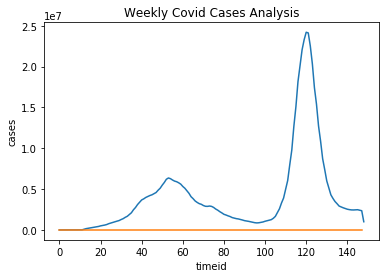

In [88]:
plt.plot(overall_week_cases.index, overall_week_cases['cases'])
plt.plot(overall_week_cases.index)
plt.xlabel('timeid')
plt.ylabel('cases')
plt.title('Weekly Covid Cases Analysis')

Text(0.5,1,'Monthly Covid Cases Analysis')

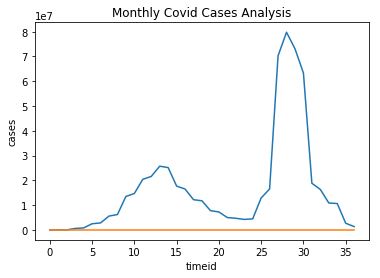

In [89]:
plt.plot(overall_month_cases.index, overall_month_cases['cases'])
plt.plot(overall_month_cases.index)
plt.xlabel('timeid')
plt.ylabel('cases')
plt.title('Monthly Covid Cases Analysis')

In [90]:
# plt.plot(month_cases1.groupby('timeid').sum())
# plt.xlabel('timeid')
# plt.ylabel('cases')
# plt.title('Monthly Covid Cases Analysis')

In [91]:
# plt.figure(figsize=(20,10))
# plt.hist(overall_cases['cases'],  density=True, bins=30)
# plt.xlabel('timeid')
# plt.ylabel('cases')
# plt.xticks(rotation=90)
# plt.title('Overall Analysis Covid Cases District-Wise')

From the above two graph we can easily say between two waves the timeid cutoff is in between 80 to 100 for weekly cases and in between 22 to 25 for monthly cases. Based on these cutoffs we'll calculate the exact timeid of the peaks.

In [92]:
#Choosing these cutoffs based on the above ranges
weekly_cutoff=90
monthly_cutoff=24

In [93]:
peak1_dict, peak2_dict={}, {}
peak1_st_dict, peak2_st_dict={}, {}
for dt in district_keys:
    print(dt)
    df = week_cases[week_cases['districtid'] == dt]
    st = df['State'].iloc[0]
    st_df = week_cases[week_cases['State'] == st]
    
    wave1_df = df[df['timeid'] <= weekly_cutoff]
    max_wave1_cases = max(wave1_df['cases'])
    peak1 = wave1_df[wave1_df['cases'] == max_wave1_cases]
    peak1_dict[dt] = peak1['timeid'].iloc[0]
    
    wave1_st_df = st_df[st_df['timeid'] <= weekly_cutoff]
    max_wave1_st_cases = max(wave1_st_df['cases'])
    peak1_st = wave1_st_df[wave1_st_df['cases'] == max_wave1_st_cases]
    peak1_st_dict[st] = peak1_st['timeid'].iloc[0]
    
    wave2_df = df[df['timeid'] > weekly_cutoff]
    wave2_st_df = st_df[st_df['timeid'] > weekly_cutoff]
    
    if len(wave2_df) == 0:
        print("Second Wave not found in district: ", dt)
        continue
    if len(wave2_st_df) == 0:
        print("Second Wave not found in state: ", df['State'].iloc[0])
        continue
    max_wave2_cases = max(wave2_df['cases'])
    peak2 = wave2_df[wave2_df['cases'] == max_wave2_cases]
    peak2_dict[dt] = peak2['timeid'].iloc[0]
    
    max_wave2_st_cases = max(wave2_st_df['cases'])
    peak2_st = wave2_st_df[wave2_st_df['cases'] == max_wave2_st_cases]
    peak2_st_dict[st] = peak2_st['timeid'].iloc[0]

AP_Anantapur
AP_Chittoor
AP_East Godavari
AP_Guntur
AP_Krishna
AP_Kurnool
AP_Prakasam
AP_S.P.S. Nellore
AP_Srikakulam
AP_Visakhapatnam
AP_Vizianagaram
AP_West Godavari
AP_Y.S.R. Kadapa
AR_Anjaw
AR_Changlang
AR_East Kameng
AR_East Siang
AR_Kamle
AR_Kra Daadi
AR_Kurung Kumey
AR_Lepa Rada
AR_Lohit
AR_Longding
AR_Lower Dibang Valley
AR_Lower Siang
AR_Lower Subansiri
AR_Namsai
AR_Pakke Kessang
AR_Papum Pare
AR_Shi Yomi
AR_Siang
AR_Tawang
AR_Tirap
AR_Upper Dibang Valley
AR_Upper Siang
AR_Upper Subansiri
AR_West Kameng
AR_West Siang
AS_Cachar
Second Wave not found in district:  AS_Cachar
AS_Dhubri
Second Wave not found in district:  AS_Dhubri
AS_Dibrugarh
AS_Goalpara
Second Wave not found in district:  AS_Goalpara
AS_Golaghat
Second Wave not found in district:  AS_Golaghat
AS_Lakhimpur
Second Wave not found in district:  AS_Lakhimpur
AS_Morigaon
Second Wave not found in district:  AS_Morigaon
AS_Udalguri
BR_Araria
BR_Arwal
BR_Aurangabad
BR_Banka
BR_Begusarai
BR_Bhagalpur
BR_Bhojpur
BR_Buxar
B

TR_Gomati
TR_Khowai
TR_North Tripura
TR_Sipahijala
TR_South Tripura
TR_Unokoti
TR_West Tripura
UP_Agra
UP_Aligarh
UP_Ambedkar Nagar
UP_Amethi
UP_Amroha
UP_Auraiya
UP_Azamgarh
UP_Baghpat
UP_Bahraich
UP_Ballia
UP_Banda
UP_Barabanki
UP_Bareilly
UP_Basti
UP_Bhadohi
UP_Bijnor
UP_Budaun
UP_Bulandshahr
UP_Chandauli
UP_Chitrakoot
UP_Deoria
UP_Etah
UP_Etawah
UP_Farrukhabad
UP_Fatehpur
UP_Firozabad
UP_Gautam Buddha Nagar
UP_Ghaziabad
UP_Ghazipur
UP_Gonda
UP_Gorakhpur
UP_Hapur
UP_Hardoi
UP_Hathras
UP_Jalaun
UP_Jaunpur
UP_Jhansi
UP_Kannauj
UP_Kanpur Dehat
UP_Kanpur Nagar
UP_Kasganj
UP_Kaushambi
UP_Kushinagar
UP_Lalitpur
UP_Lucknow
UP_Maharajganj
UP_Mahoba
UP_Mainpuri
UP_Mathura
UP_Mau
UP_Meerut
UP_Mirzapur
UP_Moradabad
UP_Muzaffarnagar
UP_Pilibhit
UP_Prayagraj
UP_Rae Bareli
UP_Rampur
UP_Saharanpur
UP_Sambhal
UP_Sant Kabir Nagar
UP_Shahjahanpur
UP_Shamli
UP_Shrawasti
UP_Siddharthnagar
UP_Sitapur
UP_Sonbhadra
UP_Sultanpur
UP_Unnao
UP_Varanasi
UT_Almora
UT_Bageshwar
UT_Chamoli
UT_Champawat
UT_Dehradu

In [94]:
weekly_peaks = pd.DataFrame({"districtid": [], "wave1 − weekid": [], "wave2 − weekid":[]})
weekly_peaks["districtid"] = district_keys
weekly_peaks["wave1 − weekid"] = list(peak1_dict.values())
weekly_peaks["wave2 − weekid"] = weekly_peaks['districtid'].apply(lambda x: peak2_dict[x] if x in peak2_dict.keys() else '')
weekly_peaks = weekly_peaks.set_index('districtid')
weekly_peaks

st_weekly_peaks = pd.DataFrame({"state": [], "wave1 − weekid": [], "wave2 − weekid":[]})
st_weekly_peaks["state"] = list(peak1_st_dict.keys())
st_weekly_peaks["wave1 − weekid"] = list(peak1_st_dict.values())
st_weekly_peaks["wave2 − weekid"] = st_weekly_peaks['state'].apply(lambda x: peak2_st_dict[x] if x in peak2_st_dict.keys() else '')
st_weekly_peaks = st_weekly_peaks.set_index('state')
st_weekly_peaks

,wave1 − weekid,wave2 − weekid
state,,
Nagaland,64,124
West Bengal,69,123
Meghalaya,60,125
Chhattisgarh,52,113
Arunachal Pradesh,58,142
Uttar Pradesh,54,115
Odisha,50,122
Telangana,9,
Goa,3,


In [95]:
mpeak1_dict, mpeak2_dict={}, {}
mpeak1_st_dict, mpeak2_st_dict={}, {}
for dt in district_keys:
    df = month_cases[month_cases['districtid'] == dt]
    st = df['State'].iloc[0]
    st_df = month_cases[month_cases['State'] == st]
    
    wave1_df = df[df['timeid'] <= monthly_cutoff]
    max_wave1_cases = max(wave1_df['cases'])
    peak1 = wave1_df[wave1_df['cases'] == max_wave1_cases]
    mpeak1_dict[dt] = peak1['timeid'].iloc[0]
    
    wave1_st_df = st_df[st_df['timeid'] <= monthly_cutoff]
    max_wave1_st_cases = max(wave1_st_df['cases'])
    peak1_st = wave1_st_df[wave1_st_df['cases'] == max_wave1_st_cases]
    mpeak1_st_dict[st] = peak1_st['timeid'].iloc[0]
    
    wave2_df = df[df['timeid'] > monthly_cutoff]
    wave2_st_df = st_df[st_df['timeid'] > monthly_cutoff]
    if len(wave2_df) == 0:
        print("Second Wave not found in district: ", dt)
        continue
    if len(wave2_st_df) == 0:
        print("Second Wave not found in state: ", st)
        continue
    max_wave2_cases = max(wave2_df['cases'])
    peak2 = wave2_df[wave2_df['cases'] == max_wave2_cases]
    mpeak2_dict[dt] = peak2['timeid'].iloc[0]
    
    max_wave2_st_cases = max(wave2_st_df['cases'])
    peak2_st = wave2_st_df[wave2_st_df['cases'] == max_wave2_st_cases]
    mpeak2_st_dict[st] = peak2_st['timeid'].iloc[0]

Second Wave not found in district:  AS_Cachar
Second Wave not found in district:  AS_Dhubri
Second Wave not found in district:  AS_Goalpara
Second Wave not found in district:  AS_Golaghat
Second Wave not found in district:  AS_Lakhimpur
Second Wave not found in district:  AS_Morigaon
Second Wave not found in district:  DL_New Delhi
Second Wave not found in district:  DL_North Delhi
Second Wave not found in district:  DL_North East Delhi
Second Wave not found in district:  DL_North West Delhi
Second Wave not found in district:  DL_South Delhi
Second Wave not found in district:  DL_West Delhi
Second Wave not found in district:  GA_North Goa
Second Wave not found in district:  MN_Imphal West
Second Wave not found in district:  TG_Adilabad
Second Wave not found in district:  TG_Bhadradri Kothagudem
Second Wave not found in district:  TG_Hyderabad
Second Wave not found in district:  TG_Jagtial
Second Wave not found in district:  TG_Jangaon
Second Wave not found in district:  TG_Jogulamba Ga

In [96]:
overall_wave1_df = overall_week_cases[overall_week_cases.index <= weekly_cutoff]
max_overall_wave1_cases = max(overall_wave1_df['cases'])
overall_week_peak1 = overall_wave1_df[overall_wave1_df['cases'] == max_overall_wave1_cases]

overall_wave2_df = overall_week_cases[overall_week_cases.index > weekly_cutoff]
max_overall_wave2_cases = max(overall_wave2_df['cases'])
overall_week_peak2 = overall_wave2_df[overall_wave2_df['cases'] == max_overall_wave2_cases]

overall_wave1_df = overall_month_cases[overall_month_cases.index <= monthly_cutoff]
max_overall_wave1_cases = max(overall_wave1_df['cases'])
overall_month_peak1 = overall_wave1_df[overall_wave1_df['cases'] == max_overall_wave1_cases]

overall_wave2_df = overall_month_cases[overall_month_cases.index > monthly_cutoff]
max_overall_wave2_cases = max(overall_wave2_df['cases'])
overall_month_peak2 = overall_wave2_df[overall_wave2_df['cases'] == max_overall_wave2_cases]

overall_peaks = pd.DataFrame({"id":["India"], "wave1 - weekid": overall_week_peak1.index.values, "wave2 - weekid": overall_week_peak2.index.values, 
                              "wave1 - monthid": overall_month_peak1.index.values,  "wave2 - monthid": overall_month_peak2.index.values})
overall_peaks = overall_peaks[['id', 'wave1 - weekid', 'wave2 - weekid', 'wave1 - monthid', 'wave2 - monthid']]
overall_peaks = overall_peaks.set_index('id')
overall_peaks

,wave1 - weekid,wave2 - weekid,wave1 - monthid,wave2 - monthid
id,,,,
India,53,120,13,28


In [97]:
monthly_peaks = pd.DataFrame({"districtid": [], "wave1 − monthid": [], "wave2 − monthid":[]})
monthly_peaks["districtid"] = district_keys
monthly_peaks["wave1 − monthid"] = list(mpeak1_dict.values())
monthly_peaks["wave2 − monthid"] = monthly_peaks['districtid'].apply(lambda x: mpeak2_dict[x] if x in mpeak2_dict.keys() else '')
monthly_peaks = monthly_peaks.set_index('districtid')
monthly_peaks

st_monthly_peaks = pd.DataFrame({"state": [], "wave1 − monthid": [], "wave2 − monthid":[]})
st_monthly_peaks["state"] = list(mpeak1_st_dict.keys())
st_monthly_peaks["wave1 − monthid"] = list(mpeak1_st_dict.values())
st_monthly_peaks["wave2 − monthid"] = st_monthly_peaks['state'].apply(lambda x: mpeak2_st_dict[x] if x in mpeak2_st_dict.keys() else '')
st_monthly_peaks = st_monthly_peaks.set_index('state')
st_monthly_peaks

,wave1 − monthid,wave2 − monthid
state,,
Nagaland,15,30
West Bengal,16,29
Meghalaya,14,30
Chhattisgarh,13,27
Arunachal Pradesh,14,33
Uttar Pradesh,13,28
Odisha,13,29
Telangana,2,
Goa,1,


In [98]:
final_peaks_data = pd.concat([weekly_peaks, monthly_peaks], axis=1)
final_peaks_data

,wave1 − weekid,wave2 − weekid,wave1 − monthid,wave2 − monthid
districtid,,,,
AP_Anantapur,58,122,14,29
AP_Chittoor,37,123,9,29
AP_East Godavari,38,124,9,29
AP_Guntur,58,122,13,29
AP_Krishna,45,125,11,29
AP_Kurnool,43,119,16,28
AP_Prakasam,38,124,9,29
AP_S.P.S. Nellore,53,123,13,29
AP_Srikakulam,51,120,18,28


In [99]:
st_final_peaks_data = pd.concat([st_weekly_peaks, st_monthly_peaks], axis=1)
st_final_peaks_data = st_final_peaks_data.reset_index()
st_final_peaks_data['stateid'] = st_final_peaks_data['state'].apply(lambda x: map_sname_skey[x])
st_final_peaks_data.drop(columns=['state'], inplace=True)
st_final_peaks_data = st_final_peaks_data.set_index('stateid')
st_final_peaks_data

,wave1 − weekid,wave2 − weekid,wave1 − monthid,wave2 − monthid
stateid,,,,
NL,64,124,15,30
WB,69,123,16,29
ML,60,125,14,30
CT,52,113,13,27
AR,58,142,14,33
UP,54,115,13,28
OR,50,122,13,29
TG,9,,2,
GA,3,,1,


In [100]:
final_peaks_data = final_peaks_data.sort_index()
st_final_peaks_data = st_final_peaks_data.sort_index()

In [101]:
final_peaks_data.to_csv('../output/district-peaks.csv')

In [102]:
st_final_peaks_data.to_csv('../output/state-peaks.csv')

In [103]:
overall_peaks.to_csv('../output/overall-peaks.csv')